In [1]:
import sys
sys.path.insert(0, "../")
from tmds import *
import os
%matplotlib inline

2.7.12 (default, Nov 12 2018, 14:36:49) 
[GCC 5.4.0 20160609]


In [2]:
s = ["CHA", "SFA-Ctk", "SFA-Pw", "SHA-Ctk", "SHA-Pw", "SRHA"]
cities = ["a", "b", "c", "d", "e"]

In [5]:
df = pd.read_csv("data.csv", sep="\t")
df["abundance"] = np.log(df["abundance"])
df["H/C"] = df["H"] / df["C"]
df["O/C"] = df["O"] / df["C"]
df["DBE"] = df["C"] - df["H"]/2 + df["N"]/2 + 1
df.sample(5)

,exp,town,abundance,mw,error,C,H,O,N,S,y,H/C,O/C,DBE
136071,SRHA,e,-2.653175,479.048916,0.115867,23,13,11,1,0,4,0.565217,0.478261,18.0
88125,SHA-Ctk,d,-4.783142,454.017336,0.242253,21,10,12,0,0,2,0.476190,0.571429,17.0
123122,SRHA,b,-3.617306,276.027006,0.011814,13,8,7,0,0,5,0.615385,0.538462,10.0
131208,SRHA,d,-2.602618,626.163766,0.335323,31,30,14,0,0,3,0.967742,0.451613,17.0
103007,SHA-Pw,d,-5.963577,403.105586,-0.003577,23,17,6,1,0,2,0.739130,0.260870,16.0


NameError: name 'data' is not defined

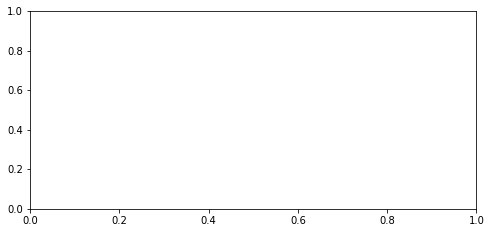

In [9]:
data = []
for k in range(5):
    data.append([])
    for i in range(6):
        data[-1].append([])
        for j in range(5):
            data[-1][-1].append(get_set_of_tuples_from_np(df[(df["exp"] == s[i]) & 
                                                             (df["town"] == cities[j]) & 
                                                             (df["y"] > k)][elems].values))

IndexError: list index out of range

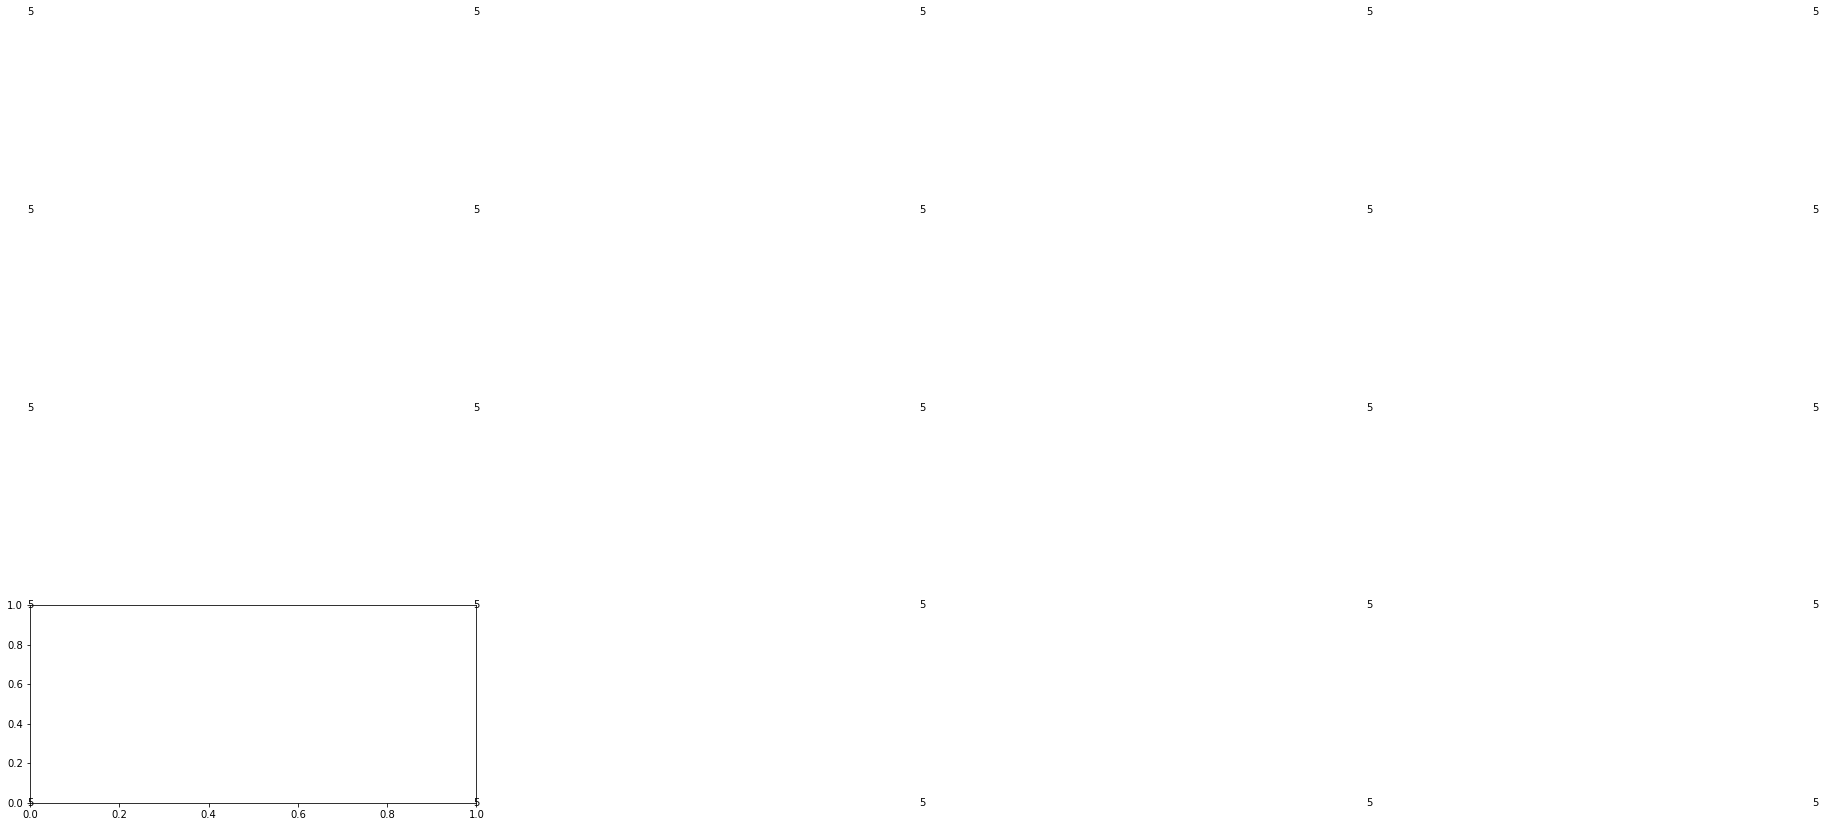

In [10]:
plt.figure(figsize=(8, 8))
counts = []
plt.subplot(211)
for i in range(6):
    counts.append([])
    for j in range(5):
        counts[-1].append(len(data[i][j]))
        plt.text(i, j, len(data[i][j]), {'ha': 'center', 'va': 'center'})
counts = np.array(counts)
plt.imshow(np.array(counts).T)
plt.yticks(range(5), cities)
plt.xticks(range(6), s, rotation="vertical")
plt.ylabel("Cities")
plt.colorbar()

plt.subplot(212)
for i in range(5):
    plt.scatter(range(6), counts[:, i], label=cities[i])
    
plt.xticks(range(6), s)
plt.legend()
plt.grid()

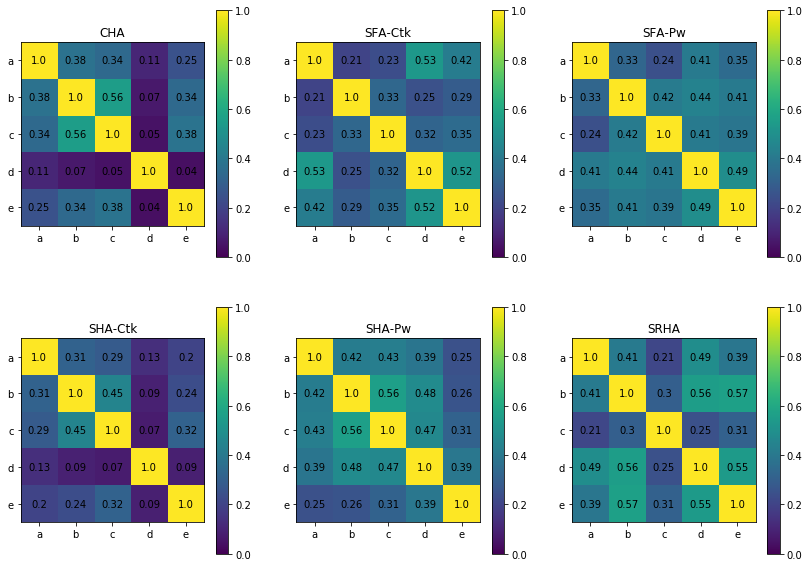

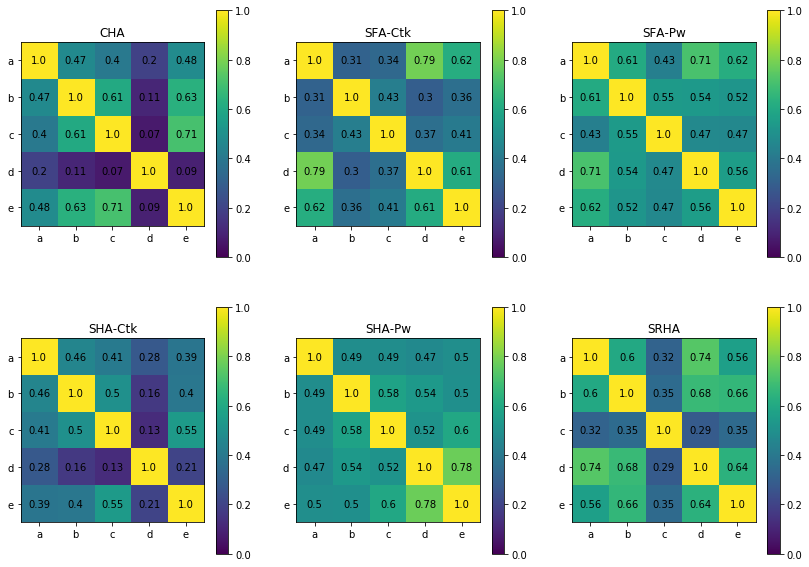

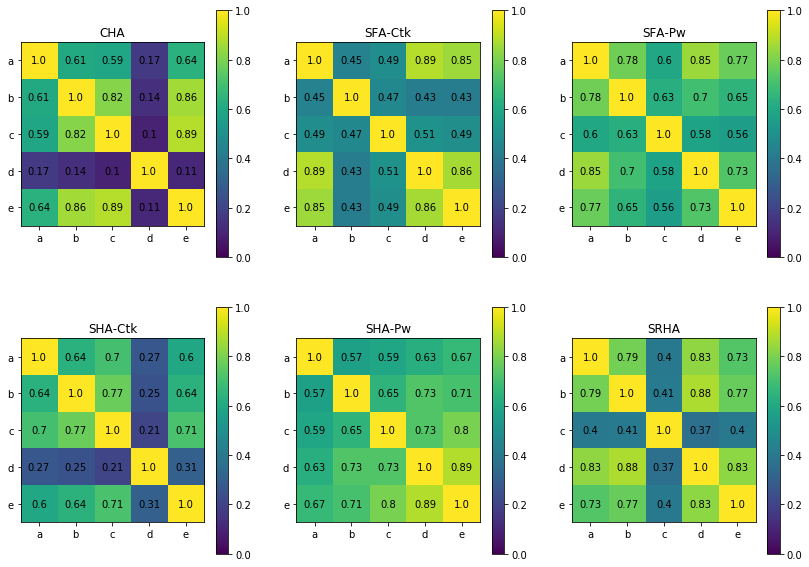

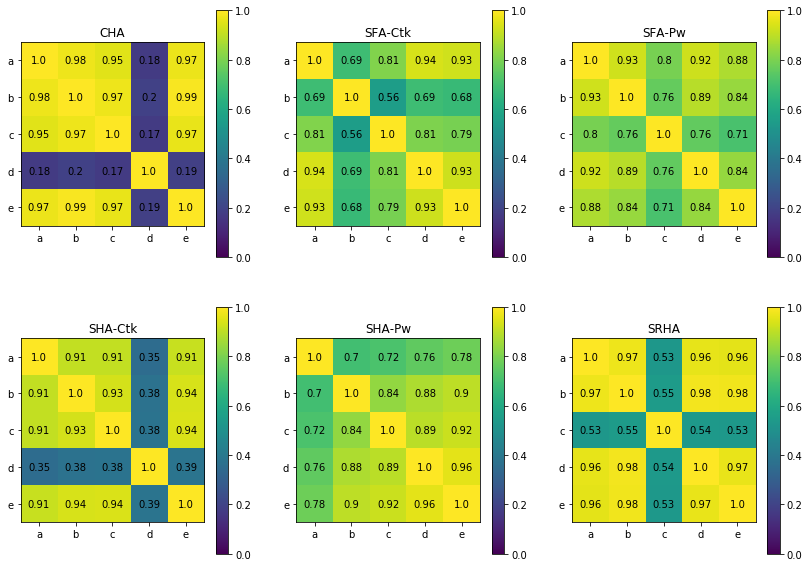

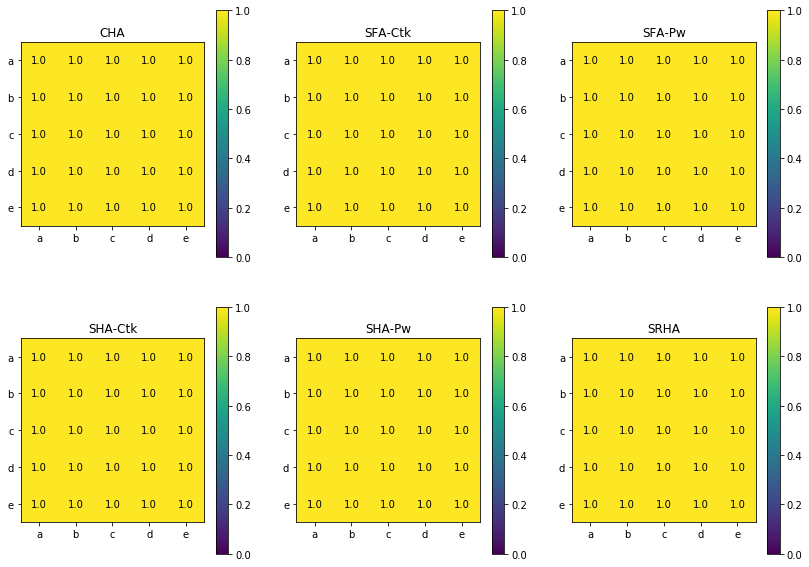

In [59]:
for k in range(5):
    plt.figure(figsize=(14, 10))
    for e in range(6):
        plt.subplot(231 + e)
        plt.title(s[e])
        corr = np.zeros((5, 5))
        for i in range(5):
            for j in range(5):
                corr[i][j] = Jaccard_Needham(data[k][e][i], data[k][e][j])
        plt.imshow(corr, vmin=0.0, vmax=1.0)
        plt.colorbar()
        plt.yticks(range(5), cities)
        plt.xticks(range(5), cities)
        for i in range(5):
            for j in range(5):
                plt.text(i, j, np.round(corr[i][j], 2), {'ha': 'center', 'va': 'center'})

In [20]:
len(data[0]), len(data), len(data[0][0])

(6, 5, 5)

In [4]:
data = []
for i in s:
    data.append([])
    for j in cities:
        data[-1].append(pd.read_csv("data/{}-{}.txt".format(i, j), sep='\t'))
        data[-1][-1] = data[-1][-1][data[-1][-1]["formula"].str.contains("13C", regex=False) != True]
        if "Unnamed: 0" in list(data[-1][-1]):
            data[-1][-1] = data[-1][-1].drop("Unnamed: 0", axis=1)

IndexError: list index out of range

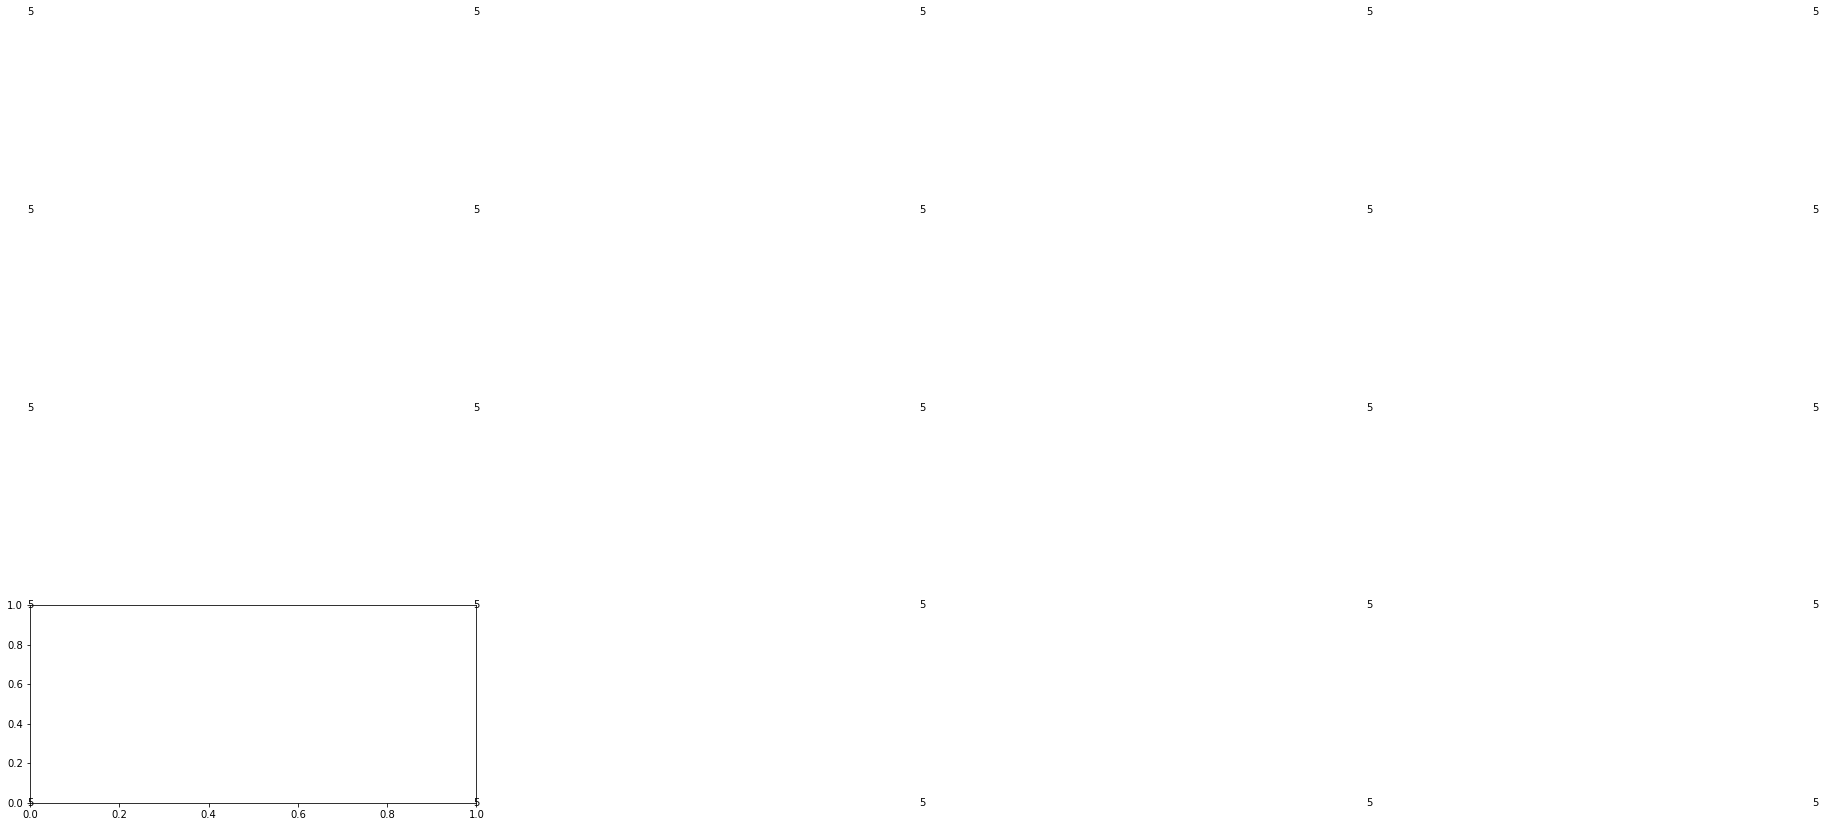

In [11]:
plt.figure(figsize=(8, 8))
counts = []
plt.subplot(211)
for i in range(6):
    counts.append([])
    for j in range(5):
        counts[-1].append(len(data[i][j]))
        plt.text(i, j, len(data[i][j]), {'ha': 'center', 'va': 'center'})
counts = np.array(counts)
plt.imshow(np.array(counts).T)
plt.yticks(range(5), cities)
plt.xticks(range(6), s, rotation="vertical")
plt.ylabel("Cities")
plt.colorbar()

plt.subplot(212)
for i in range(5):
    plt.scatter(range(6), counts[:, i], label=cities[i])
    
plt.xticks(range(6), s)
plt.legend()
plt.grid()

In [6]:
df.sample(15)

,exp,town,abundance,mw,error,C,H,O,N,S,y,H/C,O/C,DBE
61006,SFA-Pw,a,-6.317321,402.025696,0.031538,15,14,11,0,1,1,0.933333,0.733333,9.0
60583,SFA-Pw,a,-7.002100,494.109456,0.086934,19,26,13,0,1,1,1.368421,0.684211,7.0
58084,SFA-Pw,a,-6.927199,821.237816,-0.033320,37,43,20,1,0,1,1.162162,0.540541,17.0
27678,SFA-Ctk,a,-4.973857,525.017976,0.041256,23,11,14,1,0,3,0.478261,0.608696,19.0
20749,CHA,e,-4.227994,425.001886,-0.057110,19,7,11,1,0,1,0.368421,0.578947,17.0
32218,SFA-Ctk,b,-3.135654,242.079026,-0.050897,11,14,6,0,0,5,1.272727,0.545455,5.0
34841,SFA-Ctk,c,-3.342682,522.137496,0.296387,24,26,13,0,0,4,1.083333,0.541667,12.0
107957,SHA-Pw,e,-4.597748,424.245916,-0.442609,23,36,7,0,0,4,1.565217,0.304348,6.0
77285,SFA-Pw,e,-2.739999,306.146706,-0.058720,17,22,5,0,0,5,1.294118,0.294118,7.0
16233,CHA,e,-3.206533,478.199156,0.005117,28,30,7,0,0,4,1.071429,0.250000,14.0


In [8]:
abundance = []
for i in range(6):
    abundance.append([])
    for j in range(5):
        abundance[-1].append(get_dict_of_set(data[i][j], value="relativeAbundance", error="errorPPM"))

In [9]:
error = []
for i in range(6):
    error.append([])
    for j in range(5):
        error[-1].append(get_dict_of_set(data[i][j], value="errorPPM", error="errorPPM"))

In [11]:
mw = []
for i in range(6):
    mw.append([])
    for j in range(5):
        mw[-1].append(get_dict_of_set(data[i][j], value="mw", error="errorPPM"))

In [12]:
tuples = []
for i in range(6):
    tuples.append([])
    for j in range(5):
        tuples[-1].append(get_set_of_tuples_from_np(data[i][j][elems].values))

In [13]:
def get_inter_residues(n, tuples=tuples, shape=(6, 5)):
    tf = []
    for i in range(6):
        tf.append(set([]))
        for j in combinations(range(5), n):
            t = reduce(lambda x, y: x & y, map(lambda x: tuples[i][x], j))
            tf[-1] |= t

    inter = []
    for i in range(6):
        inter.append([])
        for j in range(5):
            inter[-1].append(tf[i] & tuples[i][j])

    residue = []
    for i in range(6):
        residue.append([])
        for j in range(5):
            residue[-1].append(tuples[i][j] - tf[i])
        
    return inter, residue

In [23]:
inter, residue = get_inter_residues(3)

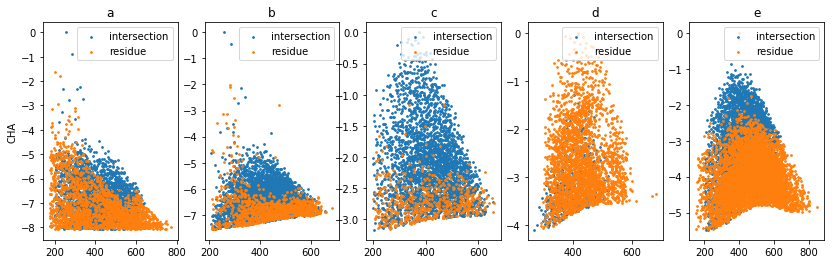

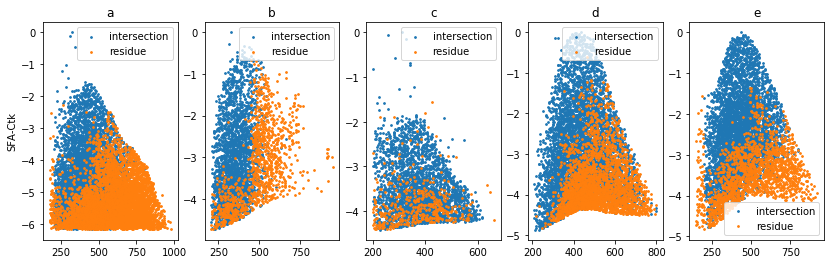

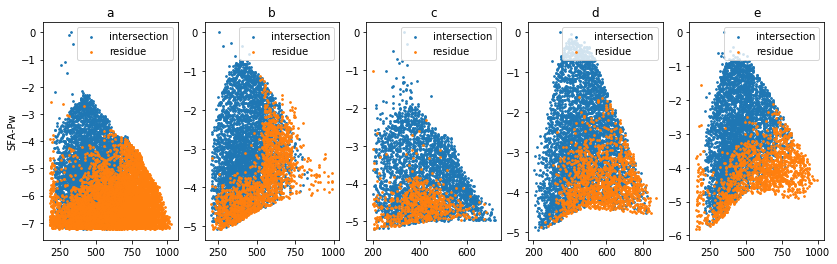

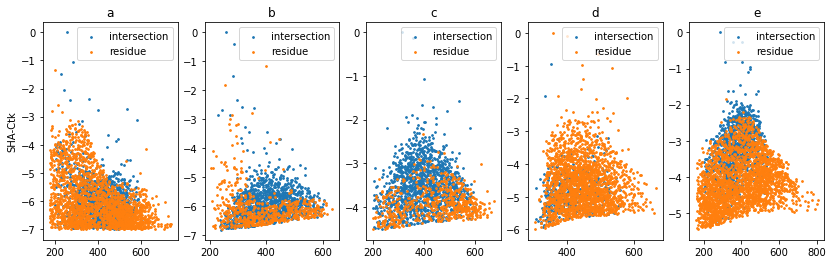

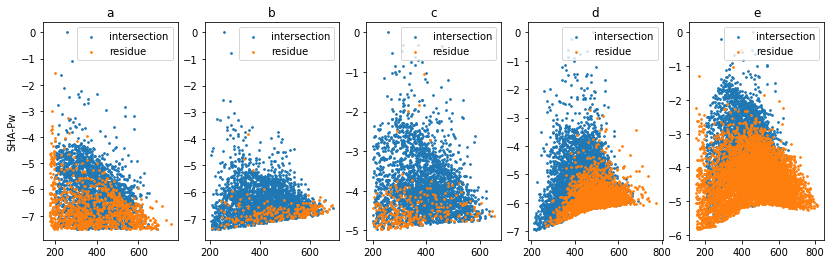

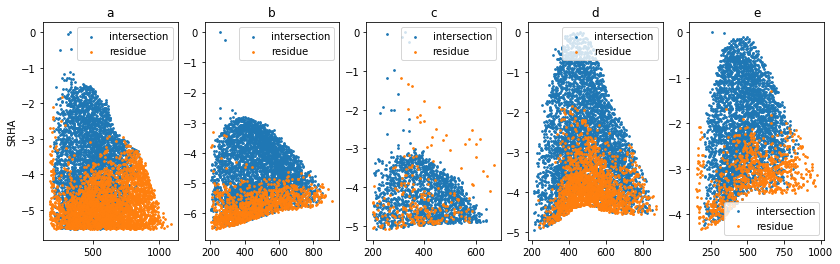

In [24]:
for j in range(6):
    plt.figure(figsize=(14, 4))
    for i in range(5):
        plt.subplot(151+i)
        if i == 0:
            plt.ylabel(s[j])
        plt.title(cities[i])
        
        M = get_mass(list(inter[j][i]))
        I = list(map(lambda x: abundance[j][i][x], inter[j][i]))
        plt.scatter(M, np.log(I), s=3, label="intersection")
        
        
        M = get_mass(list(residue[j][i]))
        I = list(map(lambda x: abundance[j][i][x], residue[j][i]))
        plt.scatter(M, np.log(I), s=3, label="residue")
        
        plt.legend()
        
        #plt.scatter(data[j][i].mw, np.log(data[j][i].relativeAbundance), s=5)

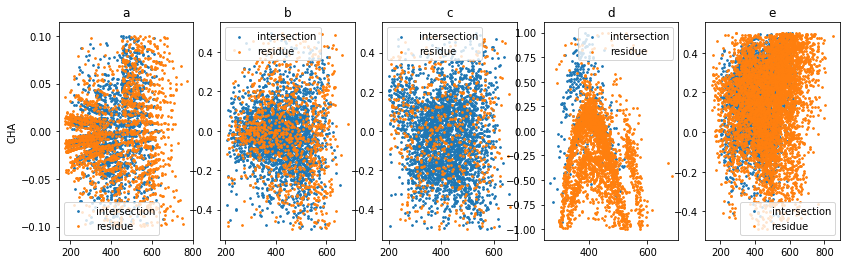

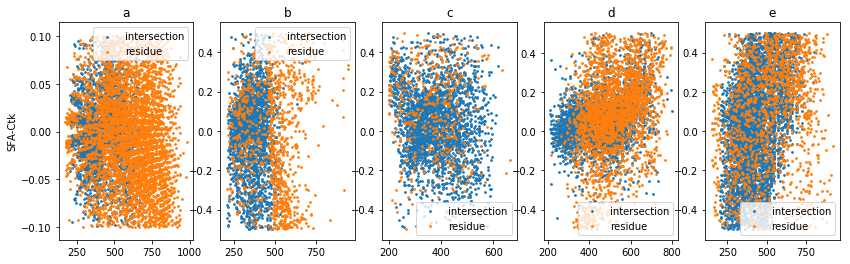

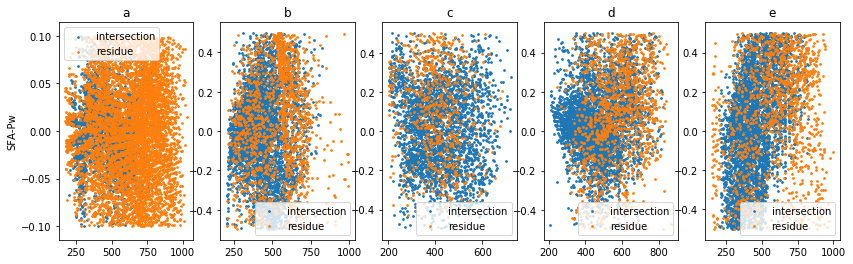

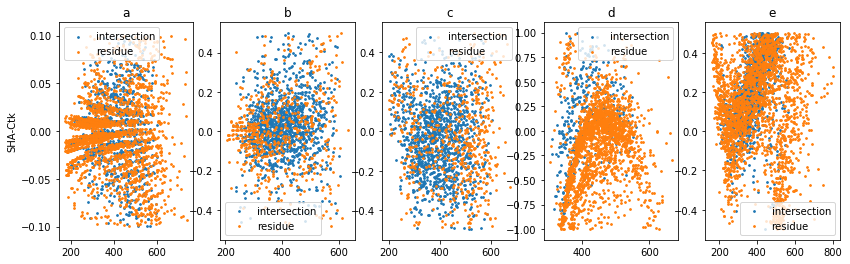

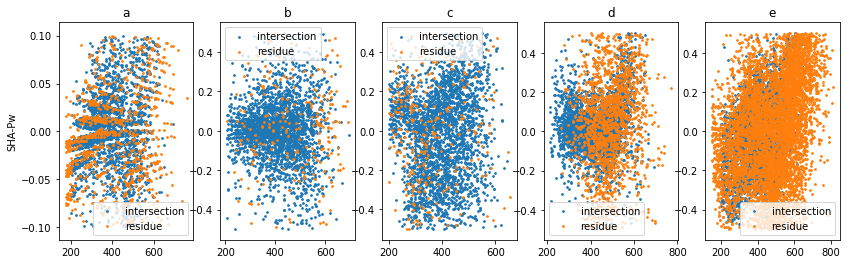

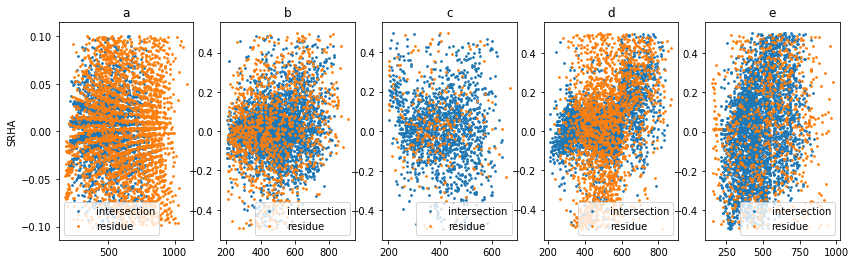

In [25]:
for j in range(6):
    plt.figure(figsize=(14, 4))
    for i in range(5):
        plt.subplot(151+i)
        if i == 0:
            plt.ylabel(s[j])
        plt.title(cities[i])
        
        M = get_mass(list(inter[j][i]))
        E = list(map(lambda x: error[j][i][x], inter[j][i]))
        plt.scatter(M, E, s=3, label="intersection")
        
        
        M = get_mass(list(residue[j][i]))
        E = list(map(lambda x: error[j][i][x], residue[j][i]))
        plt.scatter(M, E, s=3, label="residue")
        
        plt.legend()
        
        #plt.scatter(data[j][i].mw, np.log(data[j][i].relativeAbundance), s=5)

In [26]:
corr = np.zeros((30, 30))
ticks = []
for i in range(6):
    for j in range(5):
        ticks.append("{}-{}".format(s[i], cities[j]))
        for k in range(6):
            for e in range(5):
                corr[i*5 + j][k*5 + e] = Jaccard_Needham(tuples[i][j], tuples[k][e])

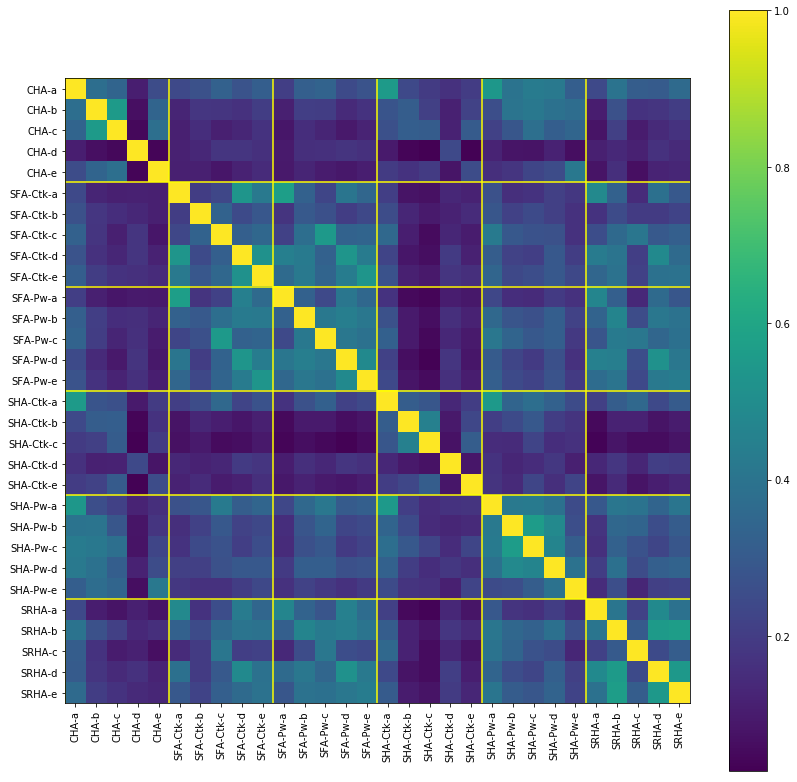

In [27]:
plt.figure(figsize=(14, 14))
plt.imshow(corr)
plt.xticks(range(30), ticks, rotation="vertical")
plt.yticks(range(30), ticks)
for i in range(6):
    plt.plot([i*5-0.5, i*5-0.5], [0-0.5, 30-.5], color="yellow")
    plt.plot([0-0.5, 30-.5], [i*5-0.5, i*5-0.5], color="yellow")
plt.colorbar()
plt.show()
